---

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">03.02 -- Feature tools experiment</h3>
</div>



In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from ultimate_utils import plot_accuracy
from ultimate_utils import print_f1_scores
from ultimate_utils import plot_confusion_matrix
from ultimate_utils import plot_roc_curve
from ultimate_utils import plot_loss


from ultimate_utils import read_ultimate_data, add_retained_label,perform_data_transforms
from ultimate_utils import perform_featuretools_dfs
from ultimate_utils import perform_xgboost_selection
from ultimate_utils import plot_correlations

from tqdm.autonotebook import tqdm
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df = read_ultimate_data()

In [3]:
df.dtypes

city                            category
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                           category
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

Create the retained label

In [4]:
add_retained_label(df)

In [5]:
df.retained.value_counts()

0    31690
1    18310
Name: retained, dtype: int64

Perform data transformations

In [6]:
perform_data_transforms(df)
df.dtypes

city                             category
trips_in_first_30_days            float64
signup_date                datetime64[ns]
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date             datetime64[ns]
phone                            category
surge_pct                         float64
ultimate_black_user                 int64
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
retained                            int64
signup_month                     category
last_trip_days_since_su             int64
dtype: object

In [7]:
all_features = df.loc[:, df.columns != 'retained']
all_target = df[['retained']]

features, X_test, target, y_test = train_test_split(all_features, all_target, shuffle=True, test_size=0.33, random_state=42)


In [8]:

features['index_col'] = features.index
target['index_col'] = target.index
target['child_index'] = target.index

feature_matrix, feature_defs = perform_featuretools_dfs(features, target)




In [9]:
feature_defs

[<Feature: retained>,
 <Feature: index_col>,
 <Feature: features.city>,
 <Feature: features.trips_in_first_30_days>,
 <Feature: features.avg_rating_of_driver>,
 <Feature: features.avg_surge>,
 <Feature: features.phone>,
 <Feature: features.surge_pct>,
 <Feature: features.ultimate_black_user>,
 <Feature: features.weekday_pct>,
 <Feature: features.avg_dist>,
 <Feature: features.avg_rating_by_driver>,
 <Feature: features.signup_month>,
 <Feature: features.last_trip_days_since_su>,
 <Feature: features.COUNT(target)>,
 <Feature: features.MAX(target.retained)>,
 <Feature: features.MEAN(target.retained)>,
 <Feature: features.MIN(target.retained)>,
 <Feature: features.SKEW(target.retained)>,
 <Feature: features.STD(target.retained)>,
 <Feature: features.SUM(target.retained)>,
 <Feature: features.DAY(last_trip_date)>,
 <Feature: features.DAY(signup_date)>,
 <Feature: features.MONTH(last_trip_date)>,
 <Feature: features.MONTH(signup_date)>,
 <Feature: features.WEEKDAY(last_trip_date)>,
 <Feature

In [10]:
feature_matrix.drop(columns=[
    'features.MAX(target.retained)', 
    'features.MEAN(target.retained)',
    'features.MIN(target.retained)',
    'features.SKEW(target.retained)',     
    'features.STD(target.retained)', 
    'features.SUM(target.retained)'], inplace=True)



In [11]:
feature_matrix.head()

,retained,index_col,features.city,features.trips_in_first_30_days,features.avg_rating_of_driver,features.avg_surge,features.phone,features.surge_pct,features.ultimate_black_user,features.weekday_pct,...,features.last_trip_days_since_su,features.COUNT(target),features.DAY(last_trip_date),features.DAY(signup_date),features.MONTH(last_trip_date),features.MONTH(signup_date),features.WEEKDAY(last_trip_date),features.WEEKDAY(signup_date),features.YEAR(last_trip_date),features.YEAR(signup_date)
child_index,,,,,,,,,,,,,,,,,,,,,
23990,0,23990,astapor,0.0,4.601559,1.0,iphone,0.0,1,100.0,...,72,1,8,26,4,1,1,6,2014,2014
8729,1,8729,king's_landing,2.0,5.000000,1.0,iphone,0.0,1,100.0,...,141,1,4,14,6,1,2,1,2014,2014
3451,1,3451,king's_landing,0.0,4.601559,1.0,iphone,0.0,0,0.0,...,152,1,22,21,6,1,6,1,2014,2014
2628,0,2628,winterfell,0.0,5.000000,1.0,iphone,0.0,0,83.3,...,131,1,20,9,5,1,1,3,2014,2014
38352,0,38352,king's_landing,3.0,5.000000,1.0,iphone,0.0,0,100.0,...,2,1,16,14,1,1,3,1,2014,2014


In [12]:
y = feature_matrix[['retained']]
X = feature_matrix.loc[:, feature_matrix.columns != 'retained']

In [13]:

top_features = perform_xgboost_selection(X, y, top_n=30)

In [14]:
top_features

,importance
features.MONTH(last_trip_date),52.0
features.DAY(last_trip_date),30.0
features.last_trip_days_since_su,21.0
features.DAY(signup_date),5.0
features.WEEKDAY(last_trip_date),4.0


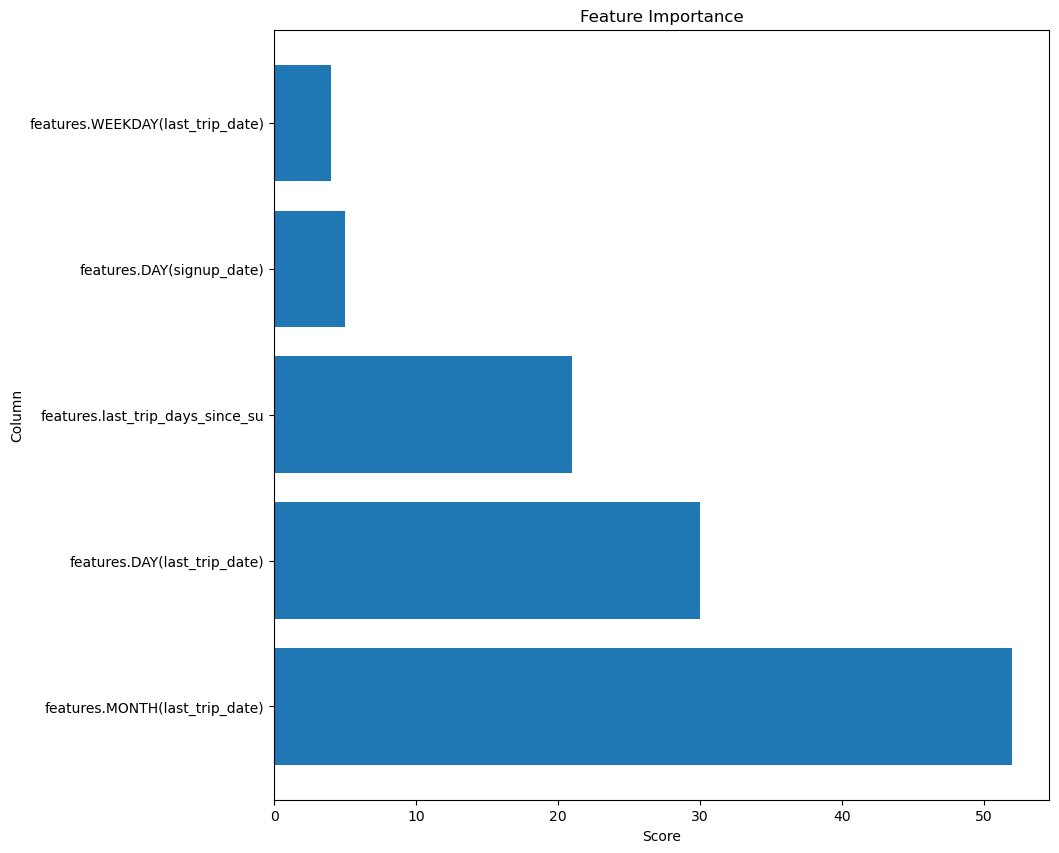

In [15]:
plot_correlations(
    scores=top_features['importance'],
    features=top_features.index, 
    title="Feature Importance" )

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def encode_features(X):
    float_columns = X.select_dtypes(include=['float']).columns.tolist()
    int_columns = X.select_dtypes(include=['int']).columns.tolist()
    category_columns = X.select_dtypes(include=['category']).columns.tolist()
    
    for col in int_columns:
        X[col] = X[col].astype(float)
        float_columns.append(col)
        
        
    X_encoded = pd.get_dummies(X, columns=category_columns)
    
    scaler = StandardScaler()
    X_encoded[float_columns] = scaler.fit_transform(X_encoded[float_columns])
    
    return X_encoded



In [17]:
X_encoded = encode_features(X)
X_test = encode_features(X_test)

In [18]:
from sklearn.preprocessing import StandardScaler
from take_homes.ultimate_data.ultimate_model import create_ultimate_origin_model, train_the_model
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, shuffle=True, test_size=0.33, random_state=42)

model = create_ultimate_origin_model(
    X_encoded.shape[1],
    regularization_rate=.0001,
    activation_function="relu",
    output_function="sigmoid")

r = train_the_model(model=model, X=X_train, y=y_train,
                    epochs_size=60,
                    batch_size=64,
                    verbose=0,
                    learning_rate=.00001,
                    validation_split=0.25,
                    # validation_data=(X_test, y_test),
                    loss_function='binary_crossentropy')


2023-09-15 13:25:13.533337: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-15 13:25:13.533361: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-09-15 13:25:13.533364: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-09-15 13:25:13.533408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-15 13:25:13.533423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-09-15 13:25:14.554419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-15 13:25:17.932295:

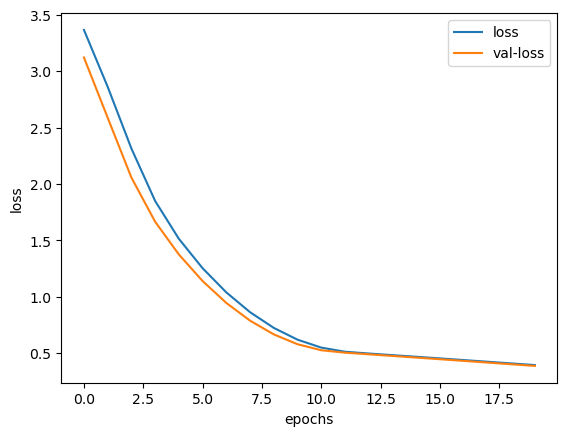

In [19]:
plot_loss(r)

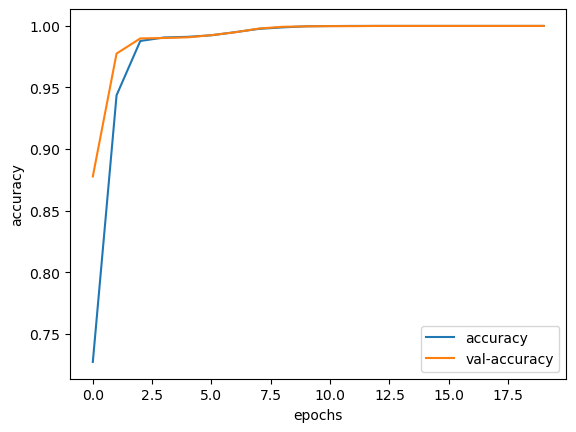

In [20]:
plot_accuracy(r)

In [21]:
threshold = 0.5
y_pred_probs = model.predict(X_test)
y_pred_binary = (y_pred_probs >= threshold).astype(int)
count = np.sum(y_pred_probs > 0.5)
print('Count of positive predictions: ', count)

 52/346 [===>..........................] - ETA: 0s

2023-09-15 13:26:06.078471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


346/346 [==============================] - 1s 3ms/step
Count of positive predictions:  4059


In [22]:
print_f1_scores(y_pred_binary, y_test)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


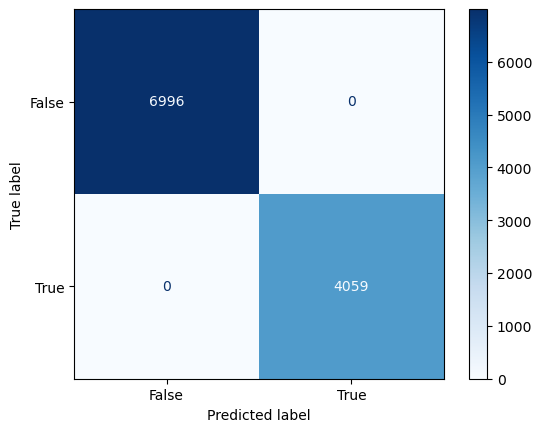

In [23]:
plot_confusion_matrix(y_pred_binary, y_test)

AUC:     1.0


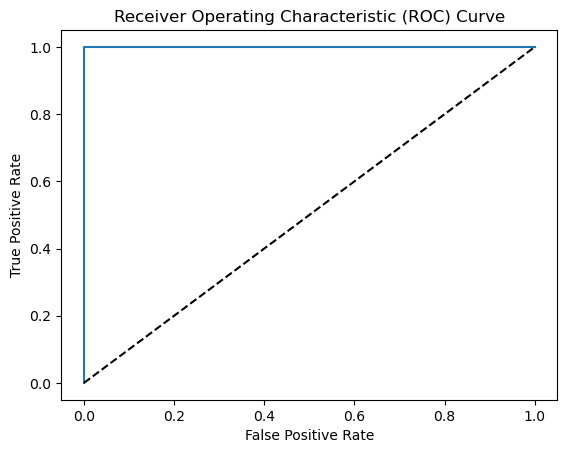

In [24]:
auc = roc_auc_score(y_test, y_pred_binary)
print("AUC:    ", auc)
plot_roc_curve(y_pred_binary, y_test)